In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

##Data

In [61]:
df = pd.read_csv("iris.data")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df["class"]=df["class"].replace("Iris-setosa",2)
df["class"]=df["class"].replace("Iris-versicolor",1)
df["class"]=df["class"].replace("Iris-virginica",0)
df.head()

/tmp/ipython-input-987417678.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"]=df["class"].replace("Iris-virginica",0)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


##Implementation

In [67]:
def gradient_descent(X,y,n_iters,learning_rate):
  n = len(y)   #number of example

  X = np.array(X)
  y = np.array(y)

  n_features = X.shape[1]  #number of features

  W1 = np.random.rand(n_features,64)   #weight of the first layer
  b1 = np.random.rand(1,64)            #bias of the first layer

  W2 = np.random.rand(64,3)        #weight of the second layer
  b2 = np.random.rand(1,3)         #bias of the second layer

  y_onehot = compute_y_onehot(y)    #convert to (len(y),3) matrix with a 1 for at the indice of the class that the first example is part of (3 for 3 classes)
  Losses = []

  for k in range(n_iters):
    Z1 = X @ W1 + b1            #linear part of the first layer
    A1 = Relu(Z1)               #Activation funciton of the first layer:Relu

    Z2 = A1 @ W2 + b2          #linear part of the second layer
    A2 = softmax(Z2)           #Activation funciton of the first layer:softmax

    Loss = - np.sum(y_onehot*np.log(A2))/n     #cross-entropy loss
    Losses.append(Loss)

    dZ2 = (1/n)*(A2 - y_onehot)     # shape (n,3)       #d? is the derivative of the loss fonction with respect to ?
    #gradients layer 2
    dW2 = A1.T @ dZ2      # shape (64, C)   #computed with the chain rule of derivation
    db2 = np.sum(dZ2, axis=0, keepdims=True)  # shape (1, C)

    dA1 = dZ2 @ W2.T   # shape (n, 64)
    dZ1 = dA1 * (Z1 > 0)  # shape (N, 64)
    #gradients layer 1
    dW1 = X.T @ dZ1      # shape (n_features, 64)
    db1 = np.sum(dZ1, axis=0, keepdims=True)  # shape (1, 64)

    # gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

  return W2,b2,W1,b1,Losses



def Relu(z):  #Relu fonction
  return np.maximum(z,0)

def softmax(z):   #softmax function
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def compute_y_onehot(y):             #instead of having the class (0 or 1 or 2) for every row, create a list where the class is the index of the 1
  y_onehot = np.zeros((len(y),3))    #in this list (all the other term are set to 0)
  for k in range(len(y)):
    y_onehot[k][y[k]] = 1
  return y_onehot

def split_data(df,target_name): # take the whole df and target's name and return the split data in an adapted form for the gradient_descent function
  df=copy.deepcopy(df)

  train, val, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))]) #split at 0.6 of the df lenght and 0.8 of the df lenght

  df_1=train.drop([target_name],axis=1)
  X_train = df_1.values.tolist()         #list of list of the features for train
  y_train = train[target_name].tolist()   #list of target for train

  df_2=val.drop([target_name],axis=1)
  X_val = df_2.values.tolist()          #list of list of the features for val
  y_val = val[target_name].tolist()    #list of target for val

  df_3=test.drop([target_name],axis=1)
  X_test = df_3.values.tolist()          #list of list of the features for test
  y_test = test[target_name].tolist()    #list of target for test

  return X_train,y_train,X_val,y_val,X_test,y_test

def scale_features(X):    #normalize features
    X = np.array(X)
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    return (X - means) / stds, means, stds

def y_pred(X,W2,b2,W1,b1):   #return the prediction based on the input X and the weight and the bias given
  Z1 = X @ W1 + b1
  A1 = Relu(Z1)

  Z2 = A1 @ W2 + b2
  A2 = softmax(Z2)

  class_ = np.argmax(A2, axis=1)
  return class_

def accuracy(y,y_preds):
  return np.mean(y == y_preds)

def NN(df,n_iters,lr,target_name):
    X_train_1,y_train,X_val_1,y_val,X_test_1,y_test = split_data(df,target_name)    #split the data into training/validation/test set
    X_val_1, X_test_1 = np.array(X_val_1), np.array(X_test_1)

    X_train, means, stds = scale_features(X_train_1)       #normalize the trainig set
    X_val, X_test = (X_val_1 - means)/stds, (X_test_1 - means)/stds      #normalize the 2 other set with the mean and variance computed for the training set

    W2,b2,W1,b1,Losses = gradient_descent(X_train,y_train,n_iters,lr)    #fit the model with training set

    X_val = np.array(X_val)
    y_val = np.array(y_val)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    y_preds_val = y_pred(X_val,W2,b2,W1,b1)         #predictions for val set
    accuracy_val = accuracy(y_val,y_preds_val)

    y_preds_test = y_pred(X_test,W2,b2,W1,b1)        #predictions for test set
    accuracy_test = accuracy(y_test,y_preds_test)

    return accuracy_val,accuracy_test,Losses







##Result

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


0.9333333333333333
0.9666666666666667


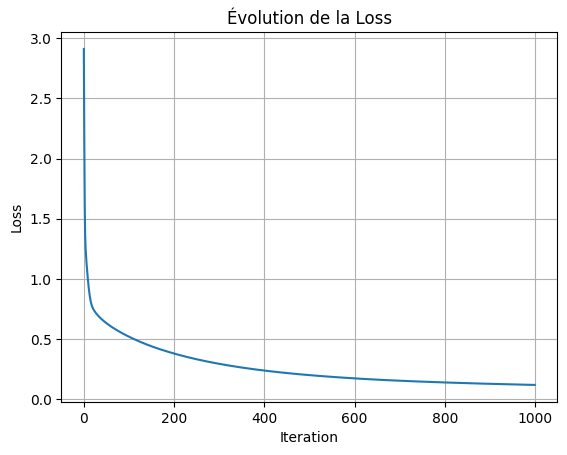

In [66]:
accuracy_val,accuracy_test,Losses = NN(df,1000,0.01,"class")
print(accuracy_val)
print(accuracy_test)
plt.plot(Losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Évolution de la Loss")
plt.grid(True)
plt.show()